In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.calibration import calibration_curve

<IPython.core.display.Javascript object>

In [3]:
parkinsons = pd.read_csv("data/parkinsons.data")

<IPython.core.display.Javascript object>

In [4]:
parkinsons.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

<IPython.core.display.Javascript object>

In [5]:
parkinsons = parkinsons.drop("name", axis=1)

<IPython.core.display.Javascript object>

In [6]:
X = parkinsons.drop("status", axis=1)
y = parkinsons["status"]

<IPython.core.display.Javascript object>

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<IPython.core.display.Javascript object>

In [8]:
model = LogisticRegression(max_iter=10000, penalty="none")

model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

<IPython.core.display.Javascript object>

In [9]:
model.score(X_train, y_train)

0.8782051282051282

<IPython.core.display.Javascript object>

In [10]:
model.score(X_test, y_test)

0.6923076923076923

<IPython.core.display.Javascript object>

In [11]:
model = LogisticRegression(max_iter=10000, penalty="l2")

model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

<IPython.core.display.Javascript object>

In [12]:
model.score(X_train, y_train)

0.8717948717948718

<IPython.core.display.Javascript object>

In [13]:
model.score(X_test, y_test)

0.717948717948718

<IPython.core.display.Javascript object>

With L2 reularization, the training accuracy was similar, while the test accuracy was improved. I removed the random seed from my split and reran multiuple times and found this trend to be true regardless of the split.

In [17]:
# c_vals = np.arange(0.05, 1.5, 0.5)

# for c in c_vals:
    

<IPython.core.display.Javascript object>

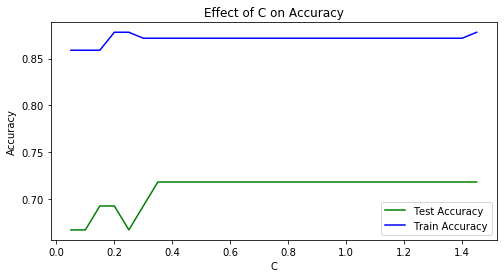

<IPython.core.display.Javascript object>

In [18]:
c_vals = np.arange(0.05, 1.5, 0.05)
test_accuracy = []
train_accuracy = []

for c in c_vals:
    lr = LogisticRegression(
        solver="lbfgs", penalty="l2", C=c, max_iter=10000, random_state=2
    )
    lr.fit(X_train, y_train)
    test_accuracy.append(lr.score(X_test, y_test))
    train_accuracy.append(lr.score(X_train, y_train))

fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(c_vals, test_accuracy, "-g", label="Test Accuracy")
ax1.plot(c_vals, train_accuracy, "-b", label="Train Accuracy")
ax1.set(xlabel="C", ylabel="Accuracy")
ax1.set_title("Effect of C on Accuracy")
ax1.legend()
plt.show()